# Исследование объявлений о продаже квартир
Рыночная стоимость квартиры — это цена, за которую ее продают и покупают. Ее указывают в объявлениях о продаже недвижимости и договорах купли-продажи.

На рыночную стоимость влияет много факторов: город, район, инфраструктура, возраст дома, качество отделки, этаж, вид из окон и даже соседи. Также имеет значение ситуация в экономике и на рынке недвижимости. Даже у двух одинаковых по планировке квартир в одном доме рыночная стоимость может быть разной.

На основе данных сервиса Яндекс Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько ле, определим, какие факторы в большей степени влияют на рыночную стоимость квартиры. Проверим, зависит ли цена квартиры от цены квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения объявления о продажи: дня недели, месяца и года. Проверим, как отличаются полученные выводы для квартир, расположенных в центре Санкт-Петербурга и по городу в целом.

**Цель исследования** — проверить две гипотизы:
1. Рыночная стоимость квартиры зависит от цены квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.
2. Дата размещения объявления влияет на цену квартиры.
3. Факторы, влияющие на стоимость квартир в центре города и в целом по городу, различны.

**Ход исследования**

Данные о недвижимости получим из файла `real_estate_data.csv`. О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится их проверить. Найдем ошибки данных и оценим их влияние на исследование. На этапе предобработки попробуем исправить критичные из них.
 
Таким образом, исследование пройдет в три этапа:
 1. Изучение данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Изучение данных из файла

Составим первое впечатление о входных данных. Для начала импортируем необходимые в исследовании библиотеки: `pandas` и `pyplot`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

Прочитаем файл `real_estate_data.csv` методом `read_csv()` и сохраним его в переменной `data`. В качестве разделителя выступает знак табуляции, передадим его в переменную `sep`.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем на экран первые 10 строк таблицы.

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу заметим наличие разных типов данных в столбцах таблицы и множество пропущенных значений. Получим общую информацию о таблице методом `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца.

* `total_images` — число фотографий квартиры в объявлении
*`last_price` — цена на момент снятия с публикации
*`total_area` — площадь квартиры (в квадратных метрах)
*`first_day_exposition` — дата публикации
*`rooms` — число комнат
*`ceiling_height` — высота потолков (в метрах)
*`floors_total` — всего этажей в доме
*`living_area` — жилая площадь (в квадратных метрах)
*`floor` — этаж
*`is_apartment` — апартаменты (булев тип)
*`studio` — квартира-студия (булев тип)
*`open_plan` — свободная планировка (булев тип)
*`kitchen_area` — площадь кухни (в квадратных метрах)
*`balcony` — число балконов
*`locality_name` — название населённого пункта
*`airports_nearest` — расстояние до ближайшего аэропорта в метрах (в метрах)
*`cityCenters_nearest` — расстояние до центра города (в метрах)
*`parks_around3000` — число парков в радиусе 3 км
*`parks_nearest` — расстояние до ближайшего парка (в метрах)
*`ponds_around3000` — число водоёмов в радиусе 3 км
*`ponds_nearest` — расстояние до ближайшего водоёма (в метрах)
*`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

### Выводы

В каждой строке таблицы — данные об объекте недвижимости. Часть колонок описывает саму квартиру: цена, площадь, число комнат, высота потолков, этаж, число балконов. Другая часть — информацию о местонахождении: название населенного пункта, расстояние до центра города, число парков и водоемов рядом. Еще одна часть колонок рассказывает об объявлении: дата публикации и срок размещения. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных
### Стиль заголовков

Изменим названия столбцов  в соответствии с хорошим стилем. Для столбцов с булевым типом значений добавим `is` в начале названия, в наименовании столбцов `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` добавим нижнее подчеркивание в качестве разделителя отдельных его частей.

In [5]:
data = data.rename(
    columns={'studio': 'is_studio', 
    'open_plan': 'is_open_plan', 
    'cityCenters_nearest': 'city_centers_nearest', 
    'parks_around3000': 'parks_around_3000', 
    'ponds_around3000': 'ponds_around_3000'})

### Заполнение пропусков
Посчитаем количество пропущенных значений в столбцах.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Наибольшее количество пропусков в столбце `is_apartment`. Скорей всего поле было необязательным для заполнения при создании объявления о продаже, значит пропущенные значения можно интерпретировать как отрицательные. На месте пропусков укажем False.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Пропущенные значения в столбце `balcony` вероятно говорят об отсутствии балкона в квартире. Заполним пропуски нулями.

In [8]:
data['balcony'] = data['balcony'].fillna(0)

Пропуски в столбцах `living_area` и `kitchen_area` заполним на основе значений для квартир с такой же общей площадью, округленной до кв. метров.

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for total_area in data['total_area'].round().unique():
        living_area_median = data.loc[data['total_area'].round() == total_area, 'living_area'].median()
        kitchen_area_median = data.loc[data['total_area'].round() == total_area, 'kitchen_area'].median()
        data.loc[data['total_area'].round() == total_area, 'living_area'] = data.loc[data['total_area'].round() == total_area, 'living_area'].fillna(living_area_median)
        data.loc[data['total_area'].round() == total_area, 'kitchen_area'] = data.loc[data['total_area'].round() == total_area, 'kitchen_area'].fillna(kitchen_area_median)

Для строк, где после заполнения пропусков общая площадь квартиры получилась меньше суммы площади кухни и жилой площади скорректируем значение площади кухни, определив его как разность значения жилой площади из значения общей площади квартиры.

In [10]:
data.loc[data['total_area'] < (data['living_area'] + data['kitchen_area']), 'kitchen_area'] = data['total_area'] - data['living_area']

Отсутствие значений в столбцах `parks_around_3000` и `ponds_around_3000` заполним следующим образом: если расстояние до ближайшего парка или озера в столбцах `parks_nearest` и `ponds_nearest` в пределах 3000 м, то проставим единицу, иначе 0. 

In [11]:
data.loc[(data['parks_around_3000'].isna() & data['parks_nearest'] <= 3000), ['parks_around_3000']] = data['parks_around_3000'].fillna(1)
data.loc[(data['parks_around_3000'].isna() & (data['parks_nearest'].isna() | data['parks_nearest'] > 3000)), ['parks_around_3000']] = data['parks_around_3000'].fillna(0)
data.loc[(data['ponds_around_3000'].isna() & data['ponds_nearest'] <= 3000), ['ponds_around_3000']] = data['ponds_around_3000'].fillna(1)
data.loc[(data['ponds_around_3000'].isna() & (data['ponds_nearest'].isna() | data['ponds_nearest'] > 3000)), ['ponds_around_3000']] = data['ponds_around_3000'].fillna(0)

Для высоты потолков, количества этажей, наименования населенного пункта, расстояний до ближайших мест и срока размещения объявления нет подходящих способов замены. Оставим значения пустыми.

Изменим тип данных в столбцах. Столбец `first_day_exposion` приведем к типу `datetime`, столбец `is_apartment` к булевому типу. Количество балконов, парков и водоемов всегда выражается целым числом, следовательно, столбцы `balcony`, `parks_around_3000`, `ponds_around_3000` приведем к типу `int`. Для удобства работы цену квартиры также приведем к целочисленному значению. 

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['last_price'] = data['last_price'].astype(int)

Для экономии памяти заменим тип данных в столбцах таблицы с float64 на float32.

In [13]:
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].astype('float32')

### Поиск дубликатов
Посчитаем явные дубликаты в таблице.

In [14]:
print(f'Явных дубликатов: {data.duplicated().sum()}')

Явных дубликатов: 0


Найдем неявные дубликаты в столбце `locality_name`. Для этого выведем на экран все уникальные значения столбца с помощью функции `unique()`.

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В наименованиях встречаются чередования букв е/ё, например "посёлок Пансионат Зелёный Бор" и "поселок Пансионат Зелёный Бор". Изменим в названиях населенных пунктов все буквы "ё" на "е" с помощью функции `replace()`.

In [16]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

### Выводы
Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- неявные дубликаты.

Мы исправили заголовки, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным. Заполнили пропуски там, где это возможно.

Теперь можно перейти к расчетам и проверке гипотез. 

## Расчёты и добавление результатов в таблицу

Найдем цену квадратного метра квартиры: для это разделим цену на общую площадь. Результат сохраним в стобце `meter_price`.

In [17]:
data['meter_price'] = (data['last_price'] / data['total_area']).astype(int)

Разложим дату публикации объявления на три столбца: `exposition_year` - год, `exposition_month` - месяц и `exposition_weekday` - день недели.

In [18]:
data['exposition_year'] = data['first_day_exposition'].dt.year
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

Категоризируем этаж квартиры `первый`, `последний` и `другой`, для этого добавим в таблицу соответствующие столбцы с булевым типов значений.

In [19]:
data['is_first_floor'] = data['floor'] == 1
data['is_last_floor'] = data['floor'] == data['floors_total']
data['is_usual_floor'] = ~(data['is_first_floor'] | data['is_last_floor']) 

Найдем соотношение жилой площади и площади кухни к общей площади квартиры. Результат сохраним в столбцах `living_share` и `kitchen_share`.

In [20]:
data['living_share'] = data['living_area'] / data['total_area']
data['kitchen_share'] = data['kitchen_area'] / data['total_area']

### Выводы
На текущем этапе в таблицу были добавлены новые столбцы:
* цена квадратного метра;
* год, месяц и день недели публикации объявления;
* категория этажа: первый, последний, иной;
* доли жилой площади и площади кухни к общей площади квартиры.

Оценим влияние новых параметров на рыночную стоимость квартир.

## Исследовательский анализ данных

### Изучение параметров квартир
Изучим распределение площади, цены, числа комнат и высоты потолков среди квартир из объявлений. Построим для перечисленных параметров гистограмму с помощью функции `hist()`.

Начнем со столбца `tota_area`, разделим график на 30 областей, передав соответствующее значение в параметр `bins`.

Text(0, 0.5, 'квартир (шт.)')

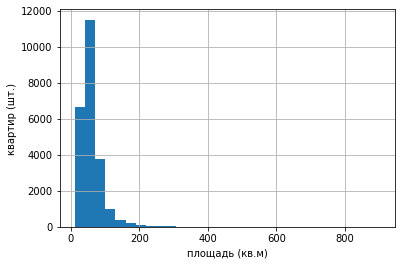

In [21]:
fig, ax = plt.subplots()
data['total_area'].hist(bins=30)
ax.set_xlabel('площадь (кв.м)')
ax.set_ylabel('квартир (шт.)')

Значения площади, превышающие 150 квадратных метров очень похоже на выбросы. Построем диаграмму размаха функцией `boxplot()`, чтобы определить, какие значения отнести к аномальным. Ограничим масштаб графика значением 150 по оси Y.

(0.0, 150.0)

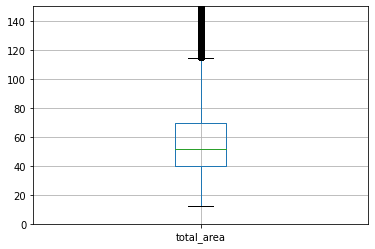

In [22]:
data.boxplot('total_area')
plt.ylim(0, 150)

Нормальный размах находится в в диапазоне значений от 10 до 110. Построим гистаграмму, передав в параметр `range` найденный размах.

Text(0, 0.5, 'квартир (шт.)')

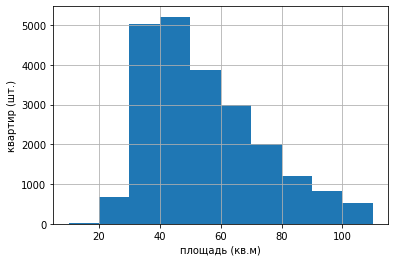

In [23]:
fig, ax = plt.subplots()
data['total_area'].hist(range=(10, 110))
ax.set_xlabel('площадь (кв.м)')
ax.set_ylabel('квартир (шт.)')

Площаль большинства квартир из объявлений находится в пределах 30 - 50 квадратных метров.

Построем гистограмму для столбца `last_price`.

Text(0, 0.5, 'квартир (шт.)')

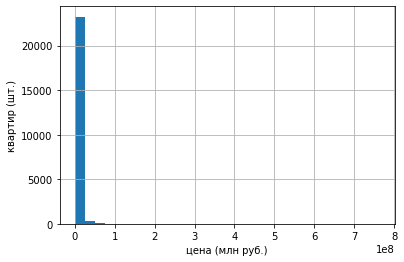

In [24]:
fig, ax = plt.subplots()
data['last_price'].hist(bins=30)
ax.set_xlabel('цена (млн руб.)')
ax.set_ylabel('квартир (шт.)')

Не очень наглядно. Необходимо исключить аномально высокие значения цены квартиры: построим диаграмму размаха, ограничив ось Y значением 20 млн рублей.

(0.0, 20000000.0)

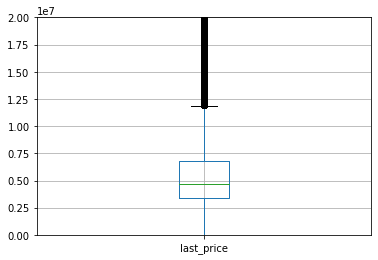

In [25]:
data.boxplot('last_price')
plt.ylim(0, 20000000)

Выбросы значений цены квартиры начинаются с 12 млн рублей. Построим гистограмму для столбца `last_price`, указав верхнее значение по оси X = 12 000 000.

Text(0, 0.5, 'квартир (шт.)')

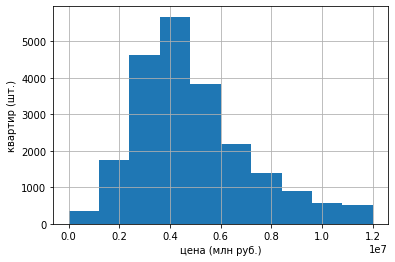

In [26]:
fig, ax = plt.subplots()
data['last_price'].hist(range = (0, 12000000))
ax.set_xlabel('цена (млн руб.)')
ax.set_ylabel('квартир (шт.)')

Стоимость большей части квартир варьируется в районе 4 миллионов рублей.

Построим гистограмму для столбца `rooms`.

Text(0, 0.5, 'квартир (шт.)')

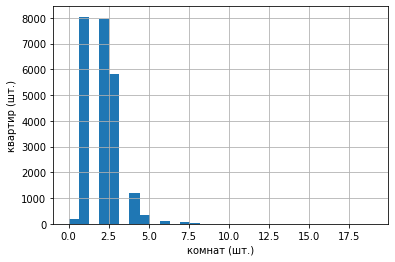

In [27]:
fig, ax = plt.subplots()
data['rooms'].hist(bins=30)
ax.set_xlabel('комнат (шт.)')
ax.set_ylabel('квартир (шт.)')

Больше всего в таблице однокомнатных и двухкомнатных квартир, чуть меньше 3-комнатных.

Наконец, узнаем распределение значений высоты потолков в квартире: построем гистограмму для столбца `ceiling_height`.

Text(0, 0.5, 'квартир (шт.)')

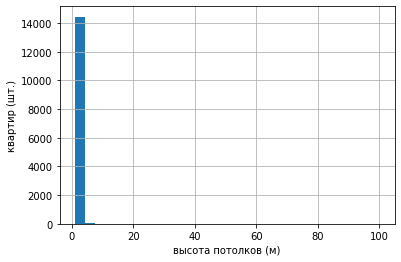

In [28]:
fig, ax = plt.subplots()
data['ceiling_height'].hist(bins=30)
ax.set_xlabel('высота потолков (м)')
ax.set_ylabel('квартир (шт.)')

Среди значений столбца присутствуют явные выбросы. Найдем их на диаграмме размаха.

(0.0, 4.0)

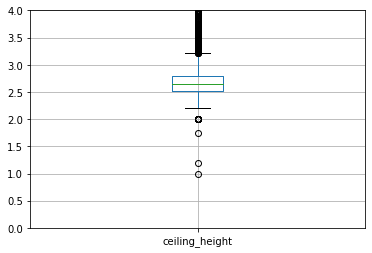

In [29]:
data.boxplot('ceiling_height')
plt.ylim(0, 4)

Исключим из гистограммы столбца `ceiling_height` аномальные значения, передав в параметр `range` минимальное значение высоты потолков: 2.2 метра и максимальное значение: 3.2 метра.

Text(0, 0.5, 'квартир (шт.)')

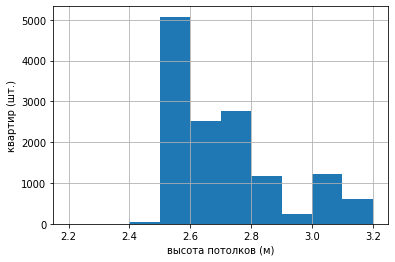

In [30]:
fig, ax = plt.subplots()
data['ceiling_height'].hist(range=(2.2, 3.2))
ax.set_xlabel('высота потолков (м)')
ax.set_ylabel('квартир (шт.)')

Высота потолков чаще всего составляет 2.5 метра.

### Анализ времени продажи квартиры
Изучим среднее время продажи квартиры. Построим гистрограмму для столбца `days_exposition`, разделенную на 30 областей, масштаб диаграммы ограничим 2 годами.

Text(0, 0.5, 'объявлений (шт.)')

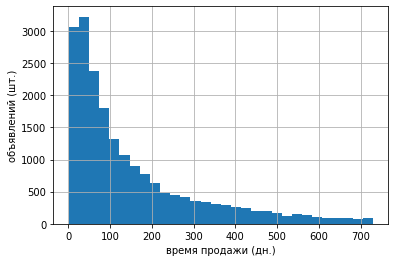

In [31]:
fig, ax = plt.subplots()
data['days_exposition'].hist(bins=30, range=(1, 730))
ax.set_xlabel('время продажи (дн.)')
ax.set_ylabel('объявлений (шт.)')

Из графика видно, что чаще всего квартиру продают в первые два месяца после размещения объявления. 

С помощью функции `describe()` узнаем медианное и среднее время продажи квартиры.

In [32]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888641
std        219.727982
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное значение - 95 дней, в то же время среднее времени продажи квартиры в 2 раза больше: полгода. Очевидно: на величину среднего значения повлияли аномально большие сроки продажи: 1580 дней (почти 5 лет).

Таким образом, быстрыми продажами можем считать продажи, расположенные до 1 квантиля, т.е. продажи, совершенные быстрее 1.5 месяцев с даты публикации объявления, долгими - расположенные за пределами 3 квантиля: продажи, совершенные позднее 232 дней с даты объявления.

### Исключение аномальных значений
При построении гистограмм для столбцов `total_area`, `last_price`, `rooms`, `ceiling_height` и `days_exposition` мы столкнулись с наличием выбросов во всех перечисленных столбцах. Создадим новую таблицу `good_data`, исключив из нее аномальные значения столбцов:

* для столбца `total_area`: значения площади квартиры более 110 кв. метров;
* для столбца `last_price`: значения стоимости квартиры менее 1 млн и более 12 млн рублей;
* для столбца `rooms`: количество комнат в квартире менее 1 и более 5;
* для столбца `ceiling_height`: значения высоты потолков менее 2.5 и более 3.2 метров;
* для столбца `days_exposition`: срок продажи квартиры более 2 лет.

Не забудем оставить в новой таблице строки с пустыми значениями высоты потолков и срока размещения объявления.

In [33]:
good_data = data.query('total_area <= 110 and 1000000 <= last_price <= 12000000 and 1 <= rooms <= 5 and (2.5 <= ceiling_height <=3.2 or ceiling_height.isna()) and (days_exposition <= 720 or days_exposition.isna())')

### Проверка первой гипотезы
Изучим, влияют ли на стоимость квартиры цена за квадратный метр, количество комнат и удаленность от центра города. Для этого найдем коэффициент корреляции между значениями столбца `meter_price` и значениями столбцов `last_price`, `floors`, `city_centers_nearest`.

In [34]:
print(f'''Корреляция между значениями столбцов last_price и meter_price: {good_data["last_price"].corr(good_data["meter_price"]):.2}
Корреляция между значениями столбцов last_price и rooms: {good_data["last_price"].corr(good_data["rooms"]):.2}
Корреляция между значениями столбцов last_price и city_centers_nearest: {good_data["last_price"].corr(good_data["city_centers_nearest"]):.2}''')

Корреляция между значениями столбцов last_price и meter_price: 0.63
Корреляция между значениями столбцов last_price и rooms: 0.42
Корреляция между значениями столбцов last_price и city_centers_nearest: -0.33


Наиболее высокая зависимость между значениями столбцов `last_price` и `meter_price`: чем выше цена квадратного метра, тем выше стоимость квартиры. Также прослеживается зависимость от значений других столбцов: чем больше комнат, тем выше цена квартиры; чем дальше удалена квартира от центра, тем дешевле она стоит.

Проверим, зависит ли стоимость квартиры от этажа, на котором она располагается: первом, последнем или ином. Для этого найдем среднее значение цены квартиры для каждого случая с помощью функции `mean()`.

In [35]:
print(f'''Средняя цена квартиры, находящейся на первом этаже: {good_data[good_data["is_first_floor"]]["last_price"].mean()/1000000:.2} млн рублей
Средняя цена квартиры, находящейся на последнем этаже: {good_data[good_data["is_last_floor"]]["last_price"].mean()/1000000:.2} млн рублей
Средняя цена квартиры, находящейся на ином этаже: {good_data[good_data["is_usual_floor"]]["last_price"].mean()/1000000:.2} млн рублей''')

Средняя цена квартиры, находящейся на первом этаже: 4.1 млн рублей
Средняя цена квартиры, находящейся на последнем этаже: 4.5 млн рублей
Средняя цена квартиры, находящейся на ином этаже: 5.0 млн рублей


Как видим, квартиры на первом этаже как правило стоят дешевле. В то же время нельзя утверждать, что квартиры на последнем этаже являются самыми дорогими.

#### Выводы
Рыночная стоимость квартиры напрямую зависит от цены квадратного метра. Также можно утверждать, что, чем больше комнат в квартире, тем она будет дороже. Расположение от центра города также оказывает влияние на стоимость квартиры, чем дальше от центра, тем ниже цена. Наконец, квартиры на первом этаже как правило стоят дешевле, но утверждение, что квартиры на последнем этаже самые дорогие - неверно.

### Проверка второй гипотезы
Определим, сказывается ли на стоимость квартиры год, месяц и день недели публикации объявления. Для этого сгруппируем данные по соответствующим столбцам и найдем среднее значение цены квадртного метра с помощью функции `pivot_table()`. Затем построим графики посредством функции `plot()`.

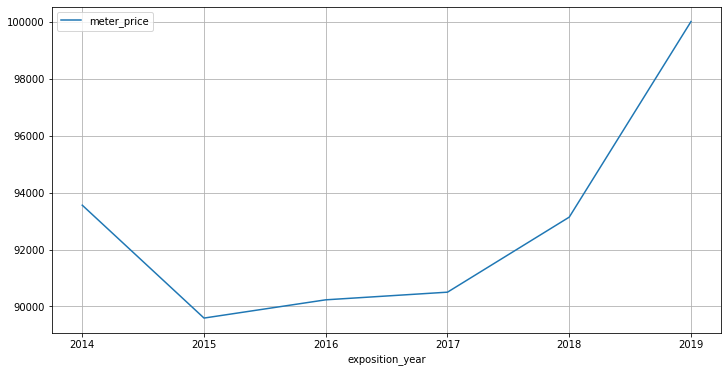

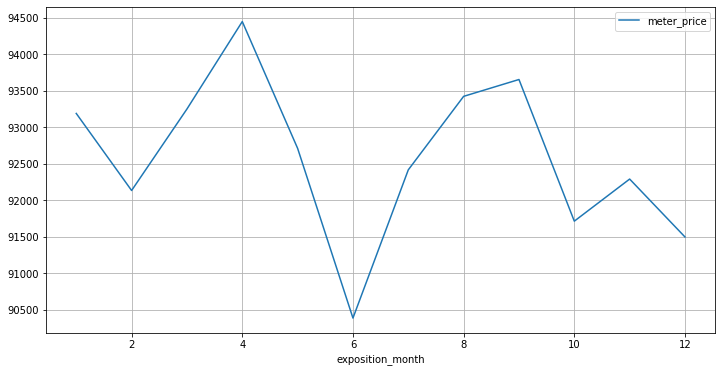

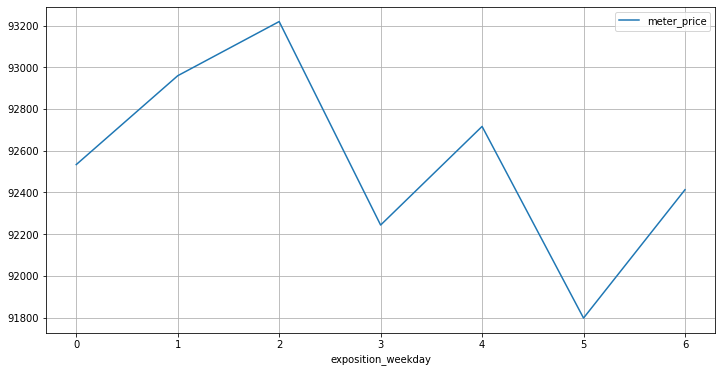

In [36]:
good_data.pivot_table(index='exposition_year', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data.pivot_table(index='exposition_month', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data.pivot_table(index='exposition_weekday', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()

На первом графике видим, что средняя цена квадратного метра уменьшилась в 2015 году, а затем начала расти вплоть до 2019, когда был зафиксирован стремительный рост.

По графику зависимости цены жилья от месяца публикации объявления можно говорить о высокой стоимости жилья в объявлениях, размещенных в апреле и низкой стоимости жилья по объявлениям июня.

На последней диаграмме не прослеживается явная зависимость между днем недели публикации объявления и стоимости жилья.

#### Выводы
Начиная с 2016 года стоимость квадратного метра квартиры стабильно увеличивается, в 2019 году зафиксирован явный скачок средней цены квадратного метра с 93 тыс. рублей в 2018 до 100 тыс. рублей в 2019 году.

Явной зависимости между рыночной стоимостью квартиры и месяцем либо днем недели публикации объявления не наблюдается.

### Проверка третьей гипотезы
Найдем населенные пункты с максимальным количеством объявлений и посчитаем среднюю стоимость квадратного в них.

In [37]:
data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean']).sort_values(('count', 'meter_price'), ascending=False).head(10).sort_values(('mean', 'meter_price'), ascending=False)

,count,mean
,meter_price,meter_price
locality_name,,
Санкт-Петербург,15721,114848.559697
Пушкин,369,103125.373984
деревня Кудрово,299,92473.073579
поселок Парголово,327,90175.486239
поселок Мурино,556,85681.298561
поселок Шушары,440,78676.900000
Колпино,338,75424.153846
Гатчина,307,68745.693811


Среди населенных пунктов с максимальным количеством объявлений наиболее высокая цена за квадратный метр в Санкт-Петербурге: около 115 тыс. рублей, далее в Пушкине: 103 тыс. рублей и Кудрово: 92.5 тыс. рублей.

Выделим квартиры, расположенные в Санкт-Петербурге, в отдельную таблицу.

In [38]:
good_data_spb = good_data.loc[good_data['locality_name'] == 'Санкт-Петербург'].copy()

Переведем расстояние до центра города в километры и округлим до целого значения, результат запишем в новом столбце `city_centers_nearest_km`.

In [39]:
good_data_spb['city_centers_nearest_km'] = good_data_spb['city_centers_nearest'] / 1000
good_data_spb['city_centers_nearest_km'] = good_data_spb.loc[good_data_spb['city_centers_nearest_km'].isna() == False, 'city_centers_nearest_km'].astype('int')

Изучим распределение значений каждого столбца полученной таблицы с помощью метода `describe`.

In [40]:
good_data_spb.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,exposition_year,exposition_month,exposition_weekday,living_share,kitchen_share,city_centers_nearest_km
count,12744.000000,1.274400e+04,12744.000000,12744.000000,7988.000000,12690.000000,12743.000000,12744.000000,12739.000000,12744.000000,...,12744.000000,6077.000000,11269.000000,12744.000000,12744.000000,12744.000000,12744.000000,12743.000000,12739.000000,12704.000000
mean,10.017028,5.584374e+06,53.526928,1.942875,2.675532,11.771001,30.617085,6.361739,9.593083,0.596202,...,0.679614,541.539551,142.091934,105622.288214,2017.443895,6.413136,2.571406,0.563161,0.188658,12.013539
std,5.562140,2.047163e+06,17.590696,0.872308,0.178679,6.354493,12.596528,4.939677,3.669815,0.950970,...,0.850187,279.161285,151.331284,23071.784929,0.973875,3.459271,1.790683,0.100459,0.067599,4.379337
min,0.000000,1.190000e+06,12.000000,1.000000,2.500000,1.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,16.000000,1.000000,17391.000000,2014.000000,1.000000,0.000000,0.038462,0.026738,0.000000
25%,6.000000,4.045000e+06,40.000000,1.000000,2.500000,6.000000,18.600000,3.000000,7.000000,0.000000,...,0.000000,325.000000,37.000000,89835.250000,2017.000000,3.000000,1.000000,0.500000,0.139073,10.000000
50%,10.000000,5.096220e+06,50.000000,2.000000,2.640000,9.000000,29.799999,5.000000,9.000000,0.000000,...,0.000000,530.000000,84.000000,102055.500000,2017.000000,6.000000,3.000000,0.568807,0.174419,12.000000
75%,14.000000,6.700000e+06,64.300003,3.000000,2.750000,16.000000,39.400002,9.000000,11.000000,1.000000,...,1.000000,756.000000,191.000000,117647.000000,2018.000000,10.000000,4.000000,0.631111,0.233333,15.000000
max,50.000000,1.200000e+07,110.000000,5.000000,3.200000,52.000000,89.100006,33.000000,48.299999,5.000000,...,3.000000,1337.000000,720.000000,387096.000000,2019.000000,12.000000,6.000000,0.973262,0.615385,29.000000


С помощью функции `pivot_table()` сгруппируем данные таблицы по расстоянию до центра в километрах и найдем среднюю цену квадратного метра жилья для каждой удаленности. Визуализируем полученные данный функцией `plot()`.

<AxesSubplot:xlabel='city_centers_nearest_km'>

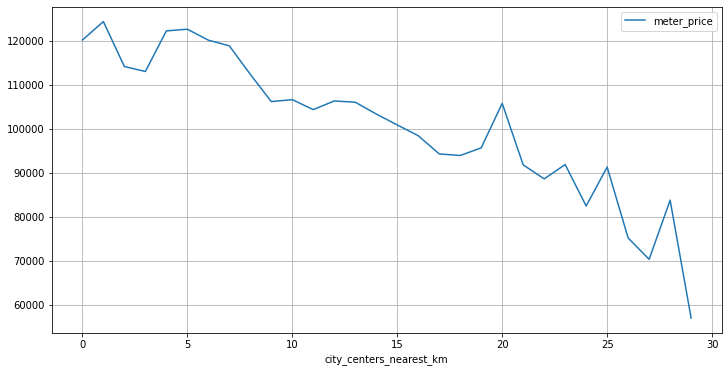

In [41]:
good_data_spb.pivot_table(index='city_centers_nearest_km', values='meter_price').plot(grid=True, figsize=(12,6))

Значительное падение в цене наблюдается между квартирами, удаленными на 7 и 8 километров от центра. Будем считать, что центр города ограничен областью, удаленной до 7 километров.

Изучим как различные факторы влияют на стоимость жилья в центре города и сравним с результатами, полученными по всей базе.

Создадим таблицу с данными по центру Санкт-Петербурга, а затем 

In [42]:
good_data_spb_center = good_data_spb[good_data_spb['city_centers_nearest_km'] <=7 ].copy()

Изучим распределение значений каждого столбца полученной таблицы с помощью метода `describe`.

In [43]:
good_data_spb_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around_3000,ponds_nearest,days_exposition,meter_price,exposition_year,exposition_month,exposition_weekday,living_share,kitchen_share,city_centers_nearest_km
count,1921.000000,1.921000e+03,1921.000000,1921.000000,1120.000000,1920.000000,1921.000000,1921.000000,1918.000000,1921.000000,...,1921.000000,1369.000000,1692.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1918.000000,1921.000000
mean,9.685060,7.200556e+06,62.308865,2.200937,2.871402,7.375521,36.273621,4.162936,10.809074,0.307652,...,1.226445,482.283417,170.582153,119734.191567,2017.317543,6.463821,2.565851,0.573513,0.182753,4.489849
std,5.601454,2.171789e+06,19.761253,0.898621,0.215331,4.155288,14.687484,3.000347,4.589172,0.700884,...,1.055861,265.023193,170.285553,30117.016583,1.003717,3.444632,1.740737,0.109018,0.076113,1.732059
min,0.000000,1.600000e+06,12.000000,1.000000,2.500000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,22.000000,3.000000,17391.000000,2014.000000,1.000000,0.000000,0.038462,0.060606,0.000000
25%,6.000000,5.550000e+06,46.000000,2.000000,2.700000,5.000000,25.000000,2.000000,8.000000,0.000000,...,0.000000,253.000000,45.000000,98096.000000,2017.000000,3.000000,1.000000,0.512739,0.131692,3.000000
50%,9.000000,6.999000e+06,60.799999,2.000000,2.900000,6.000000,35.000000,4.000000,10.000000,0.000000,...,1.000000,474.000000,104.000000,115257.000000,2017.000000,6.000000,3.000000,0.589514,0.160000,5.000000
75%,14.000000,8.700000e+06,76.300003,3.000000,3.000000,9.000000,46.599998,5.000000,12.300000,0.000000,...,2.000000,675.000000,241.250000,137176.000000,2018.000000,10.000000,4.000000,0.648968,0.215754,6.000000
max,32.000000,1.200000e+07,110.000000,5.000000,3.200000,27.000000,84.500000,21.000000,48.299999,5.000000,...,3.000000,1199.000000,719.000000,387096.000000,2019.000000,12.000000,6.000000,0.931035,0.560526,7.000000


Построим гистограммы для столбцов `total_area`, `last_price`, `rooms`, `ceiling_height` таблицы для визуализации распределения значений.

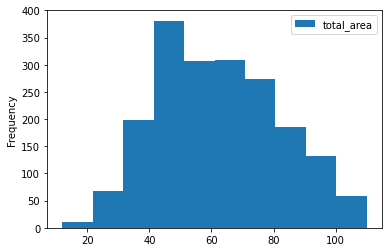

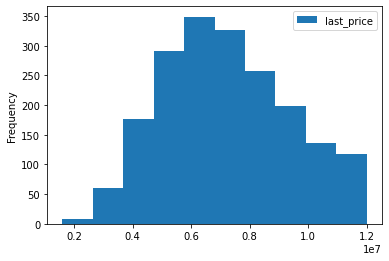

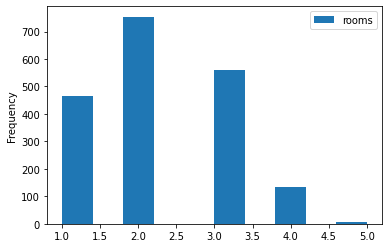

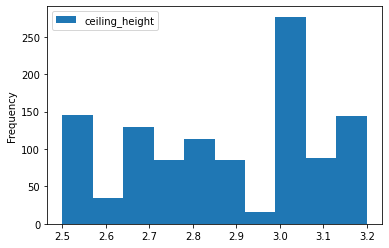

In [44]:
good_data_spb_center.plot(kind='hist', y='total_area')
plt.show()
good_data_spb_center.plot(kind='hist', y='last_price')
plt.show()
good_data_spb_center.plot(kind='hist', y='rooms')
plt.show()
good_data_spb_center.plot(kind='hist', y='ceiling_height')
plt.show()

Из графиков можно сделать следующие выводы о квартирах, расположенных в центре Петербурга:
* преобладают квартиры большого метража (от 40 до 80 кв. метров);
* стоимость квартир как правило превышает 4 миллиона рублей;
* двух и трехкомнатные квартиры составляют большую часть объявлений;
* во многих квартирах 3-х метровые потолки.

Выясним как цена за квадратный метр, количество комнат и удаленность от центра города влияют на стоимость квартир во всем Санкт-Петербурге и его центре.

In [45]:
print(f'''Корреляция между значениями столбцов last_price и meter_price в Санкт-Петербурге: {good_data_spb["last_price"].corr(good_data_spb["meter_price"]):.2}
Корреляция между значениями столбцов last_price и rooms в Санкт-Петербурге: {good_data_spb["last_price"].corr(good_data_spb["rooms"]):.2}
Корреляция между значениями столбцов last_price и city_centers_nearest в Санкт-Петербурге: {good_data_spb["last_price"].corr(good_data_spb["city_centers_nearest"]):.2}
Корреляция между значениями столбцов last_price и meter_price в центре Санкт-Петербурга: {good_data_spb_center["last_price"].corr(good_data_spb_center["meter_price"]):.2}
Корреляция между значениями столбцов last_price и rooms в цетре Санкт-Петербурга: {good_data_spb_center["last_price"].corr(good_data_spb_center["rooms"]):.2}
Корреляция между значениями столбцов last_price и city_centers_nearest в центре Санкт-Петербурга: {good_data_spb_center["last_price"].corr(good_data_spb_center["city_centers_nearest"]):.2}''')

Корреляция между значениями столбцов last_price и meter_price в Санкт-Петербурге: 0.44
Корреляция между значениями столбцов last_price и rooms в Санкт-Петербурге: 0.48
Корреляция между значениями столбцов last_price и city_centers_nearest в Санкт-Петербурге: -0.32
Корреляция между значениями столбцов last_price и meter_price в центре Санкт-Петербурга: 0.3
Корреляция между значениями столбцов last_price и rooms в цетре Санкт-Петербурга: 0.42
Корреляция между значениями столбцов last_price и city_centers_nearest в центре Санкт-Петербурга: -0.14


Можно утверждать, что существует зависимость между числом комнат и стоимостью квартиры как во всем Санкт-Петербурге, так и в его центре. В то же время цена жилья в центре города менее зависима от цены квадратного метра и совсем не зависит от расстояния до центра Спб, однако зависимость цены квартиры от этих параметров прослеживается в объявлениях всего города.

Найдем среднюю цену квартиры в Санкт-Петербурге и в центре города в зависимости от этажа, на котором она находится.

In [46]:
print(f'''Средняя цена квартиры в Санкт-Петербурге, находящейся на первом этаже: {good_data_spb[good_data_spb["is_first_floor"]]["last_price"].mean()/1000000:.2}  млн рублей
Средняя цена квартиры в Санкт-Петербурге, находящейся на последнем этаже: {good_data_spb[good_data_spb["is_last_floor"]]["last_price"].mean()/1000000:.2}  млн рублей
Средняя цена квартиры в Санкт-Петербурге, находящейся на ином этаже: {good_data_spb[good_data_spb["is_usual_floor"]]["last_price"].mean()/1000000:.2}  млн рублей
Средняя цена квартиры в центре Санкт-Петербурга, находящейся на первом этаже: {good_data_spb_center[good_data_spb_center["is_first_floor"]]["last_price"].mean()/1000000:.2}  млн рублей
Средняя цена квартиры в центре Санкт-Петербурга, находящейся на последнем этаже: {good_data_spb_center[good_data_spb_center["is_last_floor"]]["last_price"].mean()/1000000:.2}  млн рублей
Средняя цена квартиры в центре Санкт-Петербурга, находящейся на ином этаже: {good_data_spb_center[good_data_spb_center["is_usual_floor"]]["last_price"].mean()/1000000:.2}  млн рублей''')

Средняя цена квартиры в Санкт-Петербурге, находящейся на первом этаже: 5.0  млн рублей
Средняя цена квартиры в Санкт-Петербурге, находящейся на последнем этаже: 5.5  млн рублей
Средняя цена квартиры в Санкт-Петербурге, находящейся на ином этаже: 5.7  млн рублей
Средняя цена квартиры в центре Санкт-Петербурга, находящейся на первом этаже: 6.2  млн рублей
Средняя цена квартиры в центре Санкт-Петербурга, находящейся на последнем этаже: 7.2  млн рублей
Средняя цена квартиры в центре Санкт-Петербурга, находящейся на ином этаже: 7.4  млн рублей


Квартиры на первом этаже как в центре города, так и в остальных его частях стоят дешевле квартир, расположенных на других этажах. Также заметим, что квартиры в центре СПб на последнем этаже не всегда самые дорогие, это можно сказать и о данных по всему городу.

Определим, как отражается на стоимости квартиры время публикации объявления. Для этого сгруппируем данные по году, месяцу и дню недели и найдем среднее значение цены квадратного метра с помощью функции `pivot_table()`. Затем визуализируем данные посредством функции `plot()`.

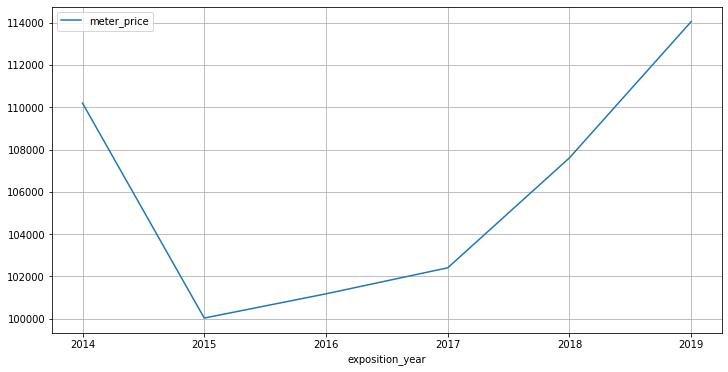

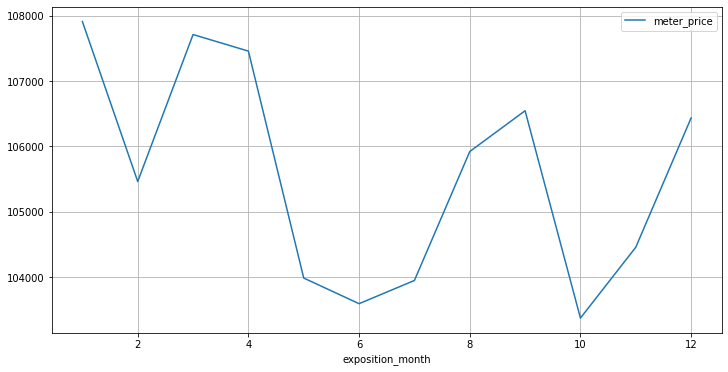

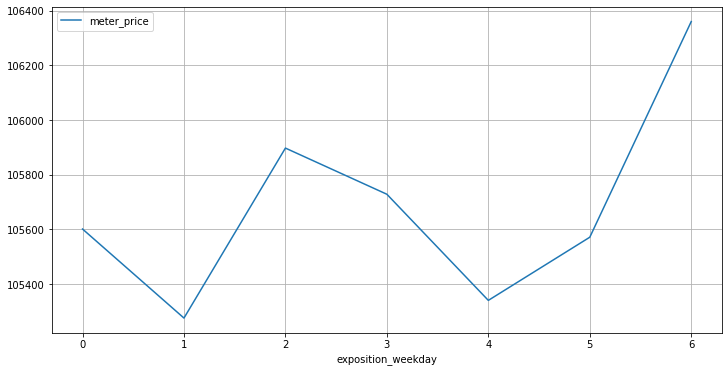

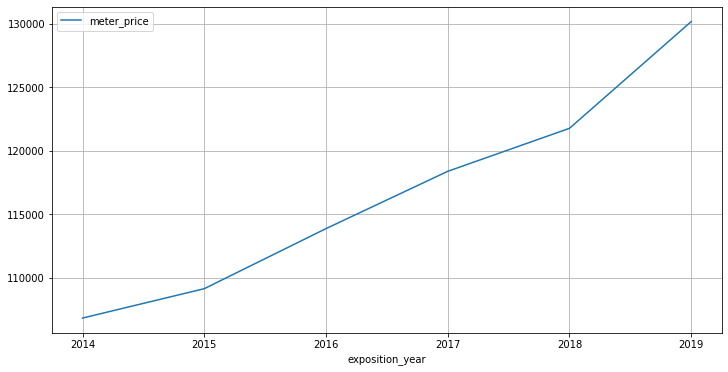

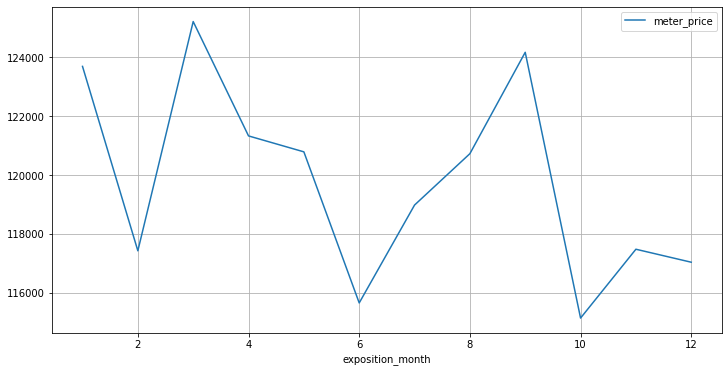

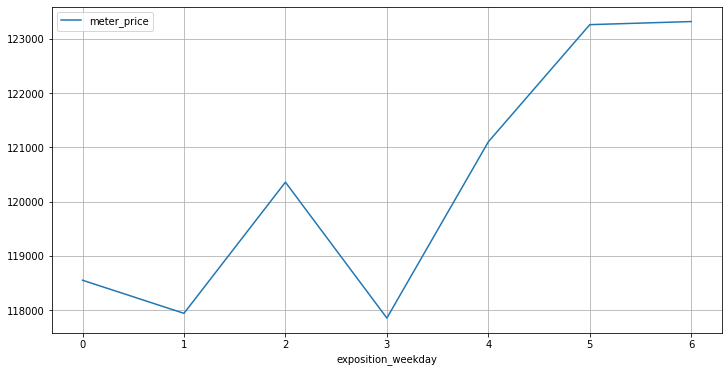

In [47]:
good_data_spb.pivot_table(index='exposition_year', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data_spb.pivot_table(index='exposition_month', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data_spb.pivot_table(index='exposition_weekday', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data_spb_center.pivot_table(index='exposition_year', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data_spb_center.pivot_table(index='exposition_month', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()
good_data_spb_center.pivot_table(index='exposition_weekday', values='meter_price').plot(grid=True, figsize=(12, 6))
plt.show()

Данные по Санкт-Петербургу практически совпадают с данными по всей базе: резкое снижение средней цены квартиры в 2015 году и плавный рост в 2016-2017 годах. Однако резкий скачок в цене начался на год раньше, уже в 2018 году средняя цена квадратного метра увеличилась на 5 тысяч рублей.

Среди квартир в центре города, рост цен наблюдается с 2015 года и продолжается в последующих годах. В 2019 цена квадратного метра квартиры резко подскочила с примерно 122 до 130 тысяч рублей .

#### Выводы
Цена квартир, расположенных в центре города в большей степени зависит от количества комнат, нежели от цены квадратного метра или удаленности. Цены на квартиры, находящиеся напервом этаже, как в центре Петербурга, так и в других его частях, наиболее дешевые. Квартиры в центре на последнем этаже - наиболее дорогие. 

В 2015 году наблюдается падение рыночной стоимости квартир, как по всей базе, так и по объявлениям Санкт-Петербурга. Однако резкий рост цены по всей базе наблюдается только в 2019 году, когда в СПб он начался на год ранее, а среди квартир в центре года уже в 2016. Что касается месяца и дня недели публикации объявления, то явной зависимости не наблюдается. Средняя цена волатильна в разные периоды времени.  

## Общий вывод

Мы проверили три гипотезы и установили:
* Чем выше цена квадратного метра, тем дороже стоит квартира. Цена квартиры зависит от количества комнат в ней. Расположение от центра города влияет на рыночную стоимость квартиры: чем дальше от центра, тем цена ниже. Квартиры на первом этаже как правило дешевле, квартиры на последнем этаже не всегда самые дорогие.
* С 2016 года стоимость квадратного метра квартиры стабильно увеличивается, в 2019 году зафиксирован скачок средней цены квадратного метра квартиры по сравнению с предыдущим периодом. Зависимости между ценой квартиры и месяцем публикации объявления нет, также как и зависимости от дня недели его публикации.
* Влияние различных факторов на стоимость квартиры в Санкт-Петербурге совпадает с результатами влияния, полученными по всей базе. Однако для квартир, находящихся в центре города, характерно иное влияние: цена на квартиры, расположенные в центре города, зависит от количества комнат, почти не зависит от цены квадратного метра, а удаленность от центра не является влияющим фактором вовсе. Рост цен на квартиры в центре СПб начался уже в 2015 году и в 2019 году цена за квадратный метр достигла 130 тысяч рублей.

Примерная рыночная цена квартиры, расположенной в Санкт-Петербурге, составляет 5.8 миллионов рублей. В большей степени на цену квартиру влияет количество комнат и площадь квартиры. Расстояние до центра также оказывает влияние на формирование рыночной цены, но в меньшей степени. 

Рыночная цена квартиры в центре города находится на уровне 7.2 миллионов рублей. Цена в первую очередь зависит от количества комнат и уже вторично зависима от общей площади. Наиболее бюджетными являются квартиры на первом этаже, квартиры на других этажах находятся в одинаковом ценовом сегменте.